# **Skin cancer**

## Librairies et fonctions utiles

In [1]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm  import tqdm
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.model_selection import train_test_split



### la dataset

On charge le dataset MNIST :

Je prépare 2 dataset, un pour XGBoost .

In [2]:
df = pd.read_csv(r"C:\Users\wissal\OneDrive\Documents\BBM\archive (5)\hmnist_28_28_L.csv")#celui ci est seulement pour un essay 
dfo = pd.read_csv(r"C:\Users\wissal\OneDrive\Documents\BBM\archive (5)\hmnist_28_28_L.csv")#dfo cdelui qui va être utilisé dans le ML.

In [3]:
df.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783,label
0,169,171,170,177,181,182,181,185,194,192,...,184,186,185,180,157,140,140,159,165,2
1,19,57,105,140,149,148,144,155,170,170,...,172,175,160,144,114,89,47,18,18,2
2,155,163,161,167,167,172,155,152,165,175,...,163,178,157,166,167,148,141,136,115,2
3,25,71,116,139,136,153,148,161,172,162,...,125,135,138,137,111,71,32,16,16,2
4,129,162,181,196,205,208,205,213,225,224,...,210,197,172,190,195,193,181,147,88,2


In [4]:
df.shape

(10015, 785)

On a 785 colonnes :

une colonne 'label' identifiant le chiffre
et 784 colonnes de pixels (image de 28x28 pixels "aplatie")

In [5]:
df.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

On a un dataframe qui est plutôt déséquilibré.

In [6]:
labels=['0','1','2','3','4','5','6']
print(labels)

['0', '1', '2', '3', '4', '5', '6']


#### Labels:


4:
Les nævus mélanocytaires sont des néoplasmes bénins des mélanocytes et apparaissent dans une myriade de variantes, qui sont toutes incluses dans notre série. Les variantes peuvent différer de manière significative d'un point de vue dermatoscopique.
[6705 images]

6:
Le mélanome est un néoplasme malin dérivé des mélanocytes qui peut apparaître sous différentes variantes. S'il est excisé à un stade précoce, il peut être guéri par une simple excision chirurgicale. Les mélanomes peuvent être invasifs ou non invasifs (in situ). Nous avons inclus toutes les variantes de mélanome, y compris le mélanome in situ, mais nous avons exclu les mélanomes non pigmentés, sous-unguéaux, oculaires ou muqueux.
[1113 images]

2:
"La kératose bénigne" est une classe générique qui comprend les kératoses séborrhéiques ("verrue sénile"), le lentigo solaire - qui peut être considéré comme une variante plate de la kératose séborrhéique - et les kératoses lichen-planus like (LPLK), qui correspondent à une kératose séborrhéique ou un lentigo solaire avec inflammation et régression [22]. Les trois sous-groupes peuvent sembler différents sur le plan dermatoscopique, mais nous les avons regroupés car ils sont similaires sur le plan biologique et souvent rapportés sous le même terme générique sur le plan histopathologique. D'un point de vue dermatoscopique, les kératoses de type lichen plan sont particulièrement problématiques car elles peuvent présenter des caractéristiques morphologiques imitant le mélanome [23] et sont souvent biopsiées ou excisées pour des raisons diagnostiques.
[1099 images]

1:
Le carcinome basocellulaire est une variante courante du cancer épithélial de la peau qui donne rarement lieu à des métastases mais qui se développe de façon destructrice s'il n'est pas traité. Il se présente sous différentes variantes morphologiques (plat, nodulaire, pigmenté, kystique, etc.) [21], qui sont toutes incluses dans cet ensemble.
[514 images]

0:
Les kératoses actiniques (kératoses solaires) et le carcinome intra-épithélial (maladie de Bowen) sont des variantes courantes et non invasives du carcinome épidermoïde qui peuvent être traitées localement sans chirurgie. Certains auteurs les considèrent comme des précurseurs de carcinomes spinocellulaires et non comme de véritables carci- nomes. On s'accorde cependant à dire que ces lésions peuvent évoluer vers un carcinome spinocellulaire invasif - qui n'est généralement pas pigmenté. Les deux néoplasmes présentent généralement une desquamation de la surface et sont souvent dépourvus de pigment. Les kératoses actiniques sont plus fréquentes sur le visage et la maladie de Bowen est plus fréquente sur les autres parties du corps. Comme les deux types de kératoses actiniques sont provoqués par les rayons UV, la peau environnante est généralement caractérisée par des lésions solaires graves, sauf dans les cas de la maladie de Bowen qui sont causés par une infection par le virus du papillome humain et non par les UV. Des variantes pigmentées existent pour la maladie de Bowen [19] et pour les kératoses actiniques [20]. Les deux sont inclus dans cet ensemble.
[327 images]

5:
Les lésions vasculaires cutanées de cet ensemble de données vont des angiomes du cerisier aux angiokératomes [25] et aux granulomes pyogènes [26]. Les hémorragies sont également incluses dans cette catégorie.
[142 images]

3:
Le dermatofibrome est une lésion cutanée bénigne considérée soit comme une prolifération bénigne, soit comme une réaction inflammatoire à un traumatisme minime. Il est brun et présente souvent une zone centrale de fibrose à la dermatoscopie [24].
[115 images]

On convertit les lignes de pixels en matrices (images) :

In [7]:
n_samples = len(df.index)
images = np.array(df.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28)

## Visualisation des images

On affiche les 50 premières:

100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:03<00:00, 12.52it/s]


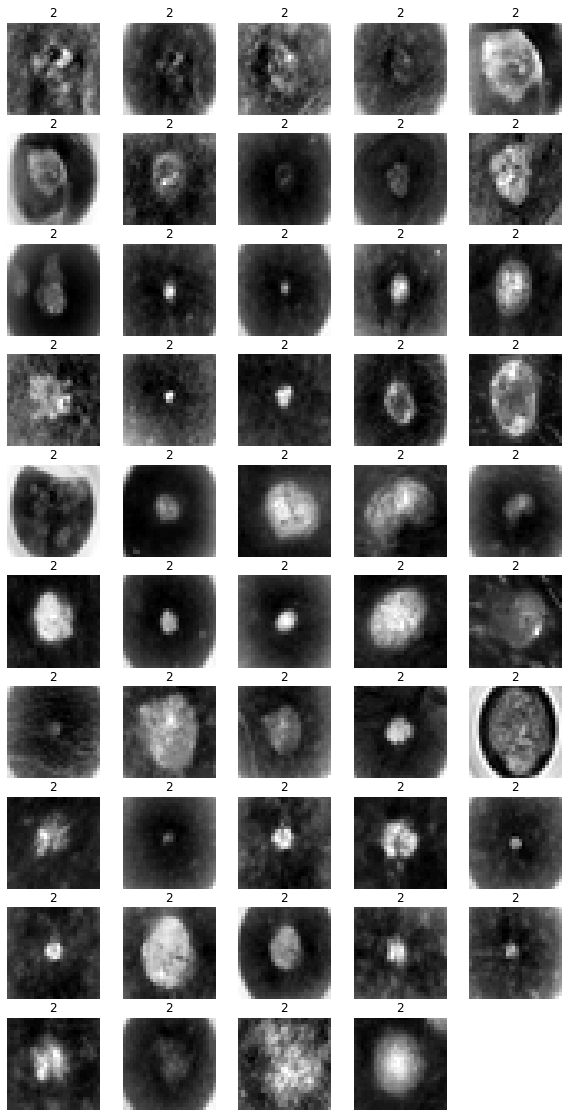

In [8]:
plt.figure(figsize=(10,20))
for i in tqdm(range(0,49)) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[df.label[i]])

## Machine Learning

On crée la cible y (colonne 'label') :

In [9]:
y = df['label']
yo = dfo['label']#1

print(y)
print(yo)#2

0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64
0        2
1        2
2        2
3        2
4        2
        ..
10010    0
10011    0
10012    0
10013    0
10014    6
Name: label, Length: 10015, dtype: int64


et les caractéristiques X :

In [10]:
X = df.drop(['label'], axis=1)
Xo = dfo.drop(['label'], axis=1)#1
print(X)
print(Xo)#2

       pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0774  pixel0775  \
0            181   

On normalise les valeurs entre 0 et 1:

In [11]:
X = X/255

On peut maintenant appliquer les méthodes de machine learning.

In [12]:
num_classes = 7

il y a 7 classes.

In [13]:
"""from tensorflow.keras.utils import to_categorical"""

'from tensorflow.keras.utils import to_categorical'

In [14]:
"""print(y[0])
y_cat = to_categorical(y)
to_categorical(yo)
print(y_cat[0])"""

'print(y[0])\ny_cat = to_categorical(y)\nto_categorical(yo)\nprint(y_cat[0])'

On sépare train et test :

In [15]:
from sklearn.model_selection import train_test_split

X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.2, random_state=1)

### XGBoost

La méthode XGBoost est dérivée des arbres de décision, et très efficace, en particulier pour de grandes quantités de données.

C’est avant tout une approche pragmatique qui permet donc de gérer des problèmes de régression comme de classification.

Pour décrire succinctement le principe, le l’algorithme travaille de manière séquentielle. Contrairement par exemple au Random Forest. cete façon de faire va le rendre plus lent bien sur mais il va surtout permettre à l’algorithme de s’améliorer par capitalisation par rapport aux exécutions précédentes. Il commence donc par construire un premier modèle qu’il va bien sur évaluer (on est bien sur de l’apprentissage supervisé). A partir de cette première évaluation, chaque individu va être alors pondérée en fonction de la performance de la prédiction. Etc.

In [16]:
!pip install xgboost

In [17]:
import xgboost as XGB
xgb  = XGB.XGBClassifier()
xgb.fit(X_traino, y_traino)
y_xgb = xgb.predict(X_testo)
cm = confusion_matrix(y_testo, y_xgb)
print(cm)
print(classification_report(y_testo, y_xgb))

C:\Users\wissal\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[  11    7   16    0   26    0    1]
 [   2   14   11    0   67    0    2]
 [   6    7   69    0  126    0   20]
 [   1    4   10    0   22    0    0]
 [   1    7   27    1 1277    0   14]
 [   1    1    1    0   27    0    2]
 [   0    1   18    0  164    0   39]]
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        61
           1       0.34      0.15      0.20        96
           2       0.45      0.30      0.36       228
           3       0.00      0.00      0.00        37
           4       0.75      0.96      0.84      1327
           5       0.00      0.00      0.00        32
           6       0.50      0.18      0.26

C:\Users\wissal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wissal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wissal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


La précision de cette algorithme est de 0,70 ce qui est correct pour une classification avec autant d'outputs.